In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
sns.set()

## Rendeles

A tábla tartalmazza a megrendeléseket
- Mezők jelentése:
    - id: rendelés azonosító
    - api_azon: rendelés azonosító nagykerben
    - **api_hiba_kod**: nagykerben automata leadásnál kapott hiba
    - api_hiba_text: nagykerben automata leadásnál kapott hiba szövegesen
    - sku: termék azonosító
    - **netto_ar**: BHP eladási nettó ár
    - **menny**: rendelt mennyiség
    - **ossz**: vásárló által fizetendő nettó összeg
    - **shipto**: szállítási mód
    - **billto**: fizetési mód
    - **kezbesit**: kézbesítés időpontja
    - **bt_irsz**: számlázás irányító szám
    - **bt_city**: számlázás város
    - bt_address: számlázás cím
    - bt_tel: számlázás telefonszám
    - **bt_ceg**: számlázás cég név
    - bt_cegado: számlázás adószám
    - st_same_bt: számlázási cím ugyan az mint a szállítási
    - st_irsz: szállítási irányítószám
    - st_city: szállítási város
    - st_address: szállítási cím
    - st_tel: szállítási telefonszám
    - from_message: vásárló megjegyzése
    - send_message: eladó megjegyzése
    - **erkezett**: rendelés érkezési időpont
    - **shop**: webáruház ahol a rendelést leadták
    - **order_in**: rendelés beérkezésének módja
    - **prod_name**: termék neve
    - **fizetendo**: rendelés leadásakor a termék beszerzési ára
    - **szallitas**: szállítási költség
    - **fizetendo_feed**: beszerzési ár automata leadáskor válaszként kapott (netto)
    - **nagyker**: mely nagyker terméke

A prod_name mező a megrendelt termék neve + tulajdonságai stringben? Nincs összegkötve a termek táblával?
- a prod name a termék neve, nincs plus, a nevében vannak tulajdonságok is
- a termék táblával való összekötést a nagyker és sku mező együtt adja 

In [3]:
df_rendeles = pd.read_csv('input/rendeles_100.csv', sep=';', index_col=0)

In [4]:
df_rendeles[:5]

,api_azon,api_hiba_kod,api_hiba_text,sku,netto_ar,menny,ossz,shipto,billto,kezbesit,...,athelyezve,aff_id,arukereso,tyretest,sendmail,kerszamla,csavarszett,csavar_netto_ar,zarol_user,zarol_ido
id,,,,,,,,,,,,,,,,,,,,,
31220,IR17-166188,0,NaN,19570R15CRSL6,13662.9921,2,27325.9842,Házhozszállítás,készpénz,2018.01.02,...,NaN,0,1,2018.01.02,",0,6",NaN,0,0,NaN,NaN
31221,IR17-166189,0,NaN,19565R16CTLM32D,15511.8110,4,62047.2440,Házhozszállítás,átutalás,2018.01.04,...,NaN,0,1,2018.01.04,",0,6",NaN,0,0,NaN,NaN
31222,IR17-166202,0,NaN,18565R14TWP51,11441.5500,4,45766.2000,Házhozszállítás,készpénz,2018.01.12,...,NaN,0,0,2018.01.04,",0,6",NaN,0,0,NaN,NaN
31223,IR17-166215,0,NaN,22570R15CRCARW,25956.6929,2,51913.3858,Házhozszállítás,átutalás,2018.01.09,...,NaN,0,1,2018.01.09,",0,6",NaN,0,0,NaN,NaN
31224,IR17-166257,0,NaN,21575R16CRKC531,24599.2125,2,49198.4250,Házhozszállítás,átutalás,2018.01.09,...,NaN,0,1,2018.01.09,",0,6",NaN,0,0,NaN,NaN


In [5]:
df_rendeles.columns

Index(['api_azon ', 'api_hiba_kod ', 'api_hiba_text ', 'sku ', 'netto_ar ',
       'menny ', 'ossz ', 'shipto ', 'billto ', 'kezbesit ', 'bt_name ',
       'bt_mail ', 'bt_irsz ', 'bt_city ', 'bt_address ', 'bt_hszam ',
       'bt_tel ', 'bt_ceg ', 'bt_cegado ', 'st_same_bt ', 'st_name ',
       'st_mail ', 'st_irsz ', 'st_city ', 'st_address ', 'st_hszam ',
       'st_tel ', 'from_message ', 'send_message ', 'own_message ',
       'erkezett ', 'mod ', 'status ', 'shop ', 'order_in ', 'prod_name ',
       'up_user ', 'mod_user ', 'fizetendo ', 'szallitas ', 'fizetendo_feed ',
       'nagyker ', 'athelyezve ', 'aff_id ', 'arukereso ', 'tyretest ',
       'sendmail ', 'kerszamla ', 'csavarszett ', 'csavar_netto_ar ',
       'zarol_user ', 'zarol_ido'],
      dtype='object')

### api_hiba_kod

In [6]:
df_rendeles[df_rendeles['api_hiba_kod '].isna()].sum().sum()

0.0

### netto_ar

In [7]:
df_rendeles.sort_values(by='netto_ar ', ascending=True, inplace=True)

In [8]:
q1_na = int(df_rendeles['netto_ar '].count()/4)
q3_na = int(3*df_rendeles['netto_ar '].count()/4)

print('Range of netto_ar: {:,.2f} - {:,.2f}'.format(df_rendeles['netto_ar '].min(), df_rendeles['netto_ar '].max()))
print('Interquartile range of netto_ar: {:,.2f} - {:,.2f}'.format(df_rendeles['netto_ar '].iloc[q1_na], df_rendeles['netto_ar '].iloc[q3_na]))

Range of netto_ar: 6,591.34 - 48,372.00
Interquartile range of netto_ar: 10,711.81 - 20,328.35


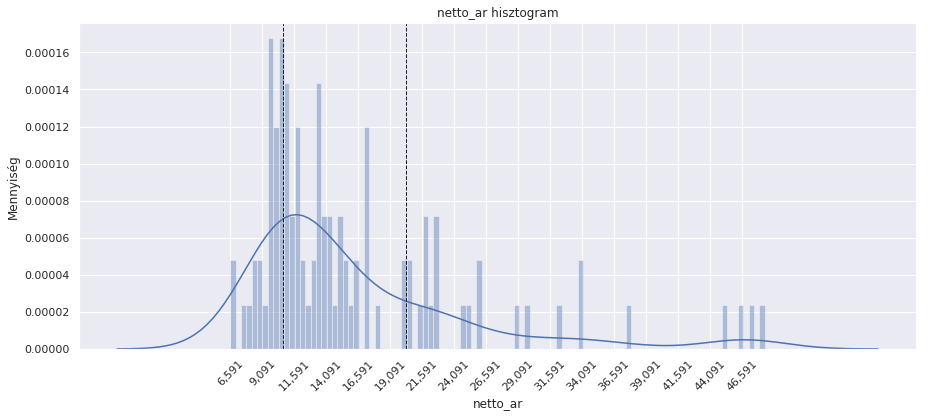

In [9]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.distplot(df_rendeles['netto_ar '].values, bins=100, norm_hist=True)

ax = plt.gca()
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)

plt.title('netto_ar hisztogram')
plt.xlabel('netto_ar')
plt.xticks(np.arange(min(df_rendeles['netto_ar ']), max(df_rendeles['netto_ar '])+1, 2500.0), rotation=45)
plt.ylabel('Mennyiség')
plt.axvline(df_rendeles['netto_ar '].iloc[q1_na], color="k", linestyle="--", linewidth=1)
plt.axvline(df_rendeles['netto_ar '].iloc[q3_na], color="k", linestyle="--", linewidth=1)
plt.show()

### menny

In [10]:
df_rendeles['menny '].describe()

count    100.000000
mean       3.250000
std        1.183856
min        1.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        6.000000
Name: menny , dtype: float64

### ossz

In [11]:
df_rendeles.sort_values(by='ossz ', ascending=True, inplace=True)

In [12]:
q1_os = int(df_rendeles['ossz '].count()/4)
q3_os = int(3*df_rendeles['ossz '].count()/4)

print('Range of ossz: {:,.2f} - {:,.2f}'.format(df_rendeles['ossz '].min(), df_rendeles['ossz '].max()))
print('Interquartile range of ossz: {:,.2f} - {:,.2f}'.format(df_rendeles['ossz '].iloc[q1_os], df_rendeles['ossz '].iloc[q3_os]))

Range of ossz: 10,648.92 - 185,174.80
Interquartile range of ossz: 29,650.39 - 68,390.55


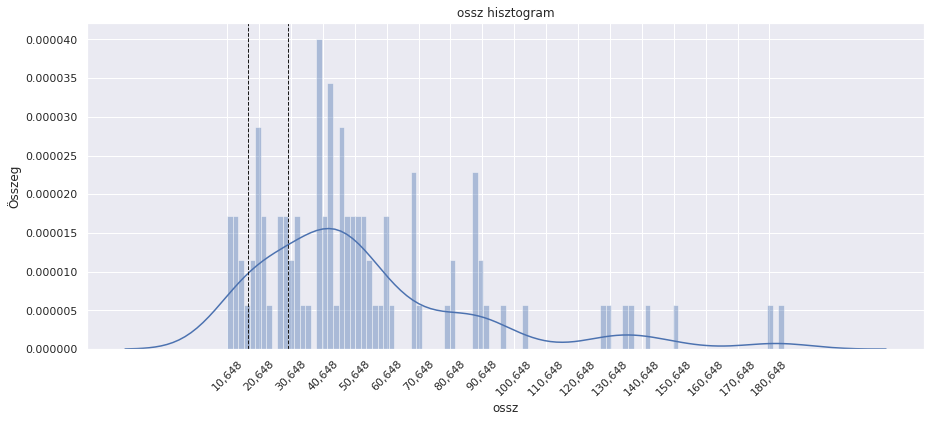

In [13]:
sns.set(rc={'figure.figsize':(15, 6)})
sns.distplot(df_rendeles['ossz '].values, bins=100, norm_hist=True)

ax = plt.gca()
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)

plt.title('ossz hisztogram')
plt.xlabel('ossz')
plt.xticks(np.arange(min(df_rendeles['ossz ']), max(df_rendeles['ossz '])+1, 10000.0), rotation=45)
plt.ylabel('Összeg')
plt.axvline(df_rendeles['netto_ar '].iloc[q1_os], color="k", linestyle="--", linewidth=1)
plt.axvline(df_rendeles['netto_ar '].iloc[q3_os], color="k", linestyle="--", linewidth=1)
plt.show()

### shipto

In [14]:
df_rendeles['shipto '].value_counts()

Házhozszállítás                      92
1039 Budapest Batthyány utca 70.      3
1119 Budapest Fehérvári út 71-73.     3
1095 Budapest Soroksári út 158.       1
1044 Budapest Megyeri út 15/A.        1
Name: shipto , dtype: int64

### billto

In [15]:
df_rendeles['billto '].value_counts()

készpénz    80
átutalás    10
kártyás      6
barion       4
Name: billto , dtype: int64

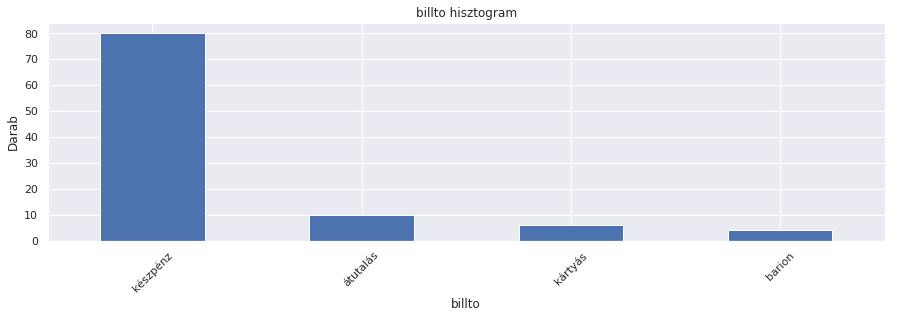

In [24]:
sns.set(rc={'figure.figsize':(15, 4)})
df_rendeles['billto '].value_counts().plot(kind='bar')

plt.title('billto hisztogram')
plt.xlabel('billto')
plt.xticks(rotation=45)
plt.ylabel('Darab')
plt.show()

### kezbesit

In [16]:
df_rendeles.sort_values(by='kezbesit ', ascending=True, inplace=True)

In [19]:
q1_ke = int(df_rendeles['kezbesit '].count()/4)
q3_ke = int(3*df_rendeles['kezbesit '].count()/4)

print('Range of kezbesit: {:} - {:}'.format(df_rendeles['kezbesit '].iloc[0], df_rendeles['kezbesit '].iloc[df_rendeles['kezbesit '].count()]))
print('Interquartile range of kezbesit: {:} - {:}'.format(df_rendeles['kezbesit '].iloc[q1_ke], df_rendeles['kezbesit '].iloc[q3_ke]))

Range of kezbesit: 2018.01.02 - nan
Interquartile range of kezbesit: 2018.01.04 - 2018.01.09


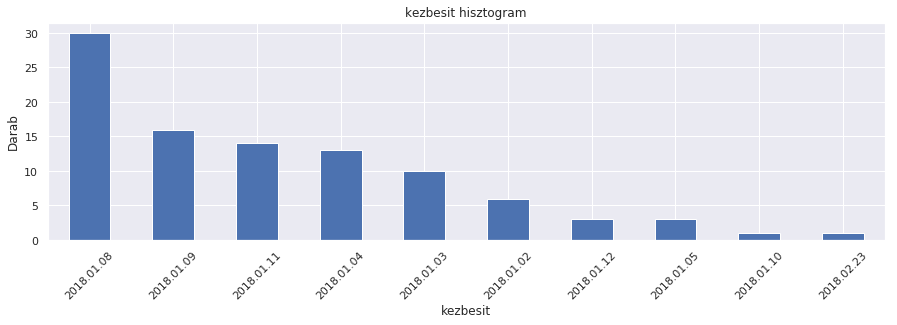

In [25]:
sns.set(rc={'figure.figsize':(15, 4)})
df_rendeles['kezbesit '].value_counts().plot(kind='bar')

plt.title('kezbesit hisztogram')
plt.xlabel('kezbesit')
plt.xticks(rotation=45)
plt.ylabel('Darab')
plt.show()

### bt_irsz

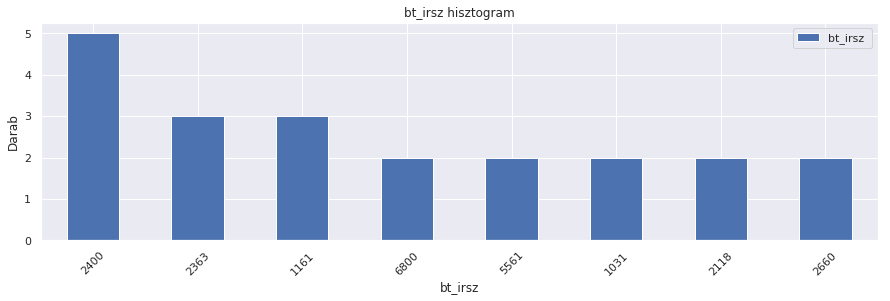

In [53]:
sns.set(rc={'figure.figsize':(15, 4)})
df_irsz = df_rendeles['bt_irsz '].value_counts().to_frame()

df_irsz[df_irsz['bt_irsz '] > 1].plot(kind='bar')

plt.title('bt_irsz hisztogram')
plt.xlabel('bt_irsz')
plt.xticks(rotation=45)
plt.ylabel('Darab')
plt.show()

### bt_city

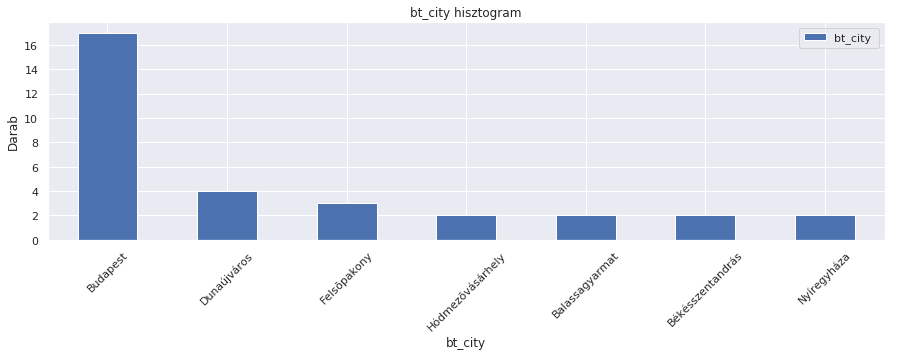

In [54]:
sns.set(rc={'figure.figsize':(15, 4)})
df_irsz = df_rendeles['bt_city '].value_counts().to_frame()

df_irsz[df_irsz['bt_city '] > 1].plot(kind='bar')

plt.title('bt_city hisztogram')
plt.xlabel('bt_city')
plt.xticks(rotation=45)
plt.ylabel('Darab')
plt.show()

### bt_ceg

In [56]:
df_rendeles['bt_ceg '].value_counts()

Drifter Kft.             3
TMode Consulting Kft.    1
H-Trio Kft.              1
Name: bt_ceg , dtype: int64

### shop

In [57]:
df_rendeles['shop '].value_counts()

bhpgumi.hu      75
nano-tyre.hu    10
arukereso.hu     7
gumi-b2b.hu      4
emag.hu          4
Name: shop , dtype: int64

### szallitas

In [59]:
df_rendeles['szallitas '].value_counts()

2316    61
1158    26
579      9
3474     2
2895     1
1737     1
Name: szallitas , dtype: int64

In [63]:
df_rendeles.sort_values(by='szallitas ', ascending=True, inplace=True)

In [64]:
q1_sz = int(df_rendeles['szallitas '].count()/4)
q3_sz = int(3*df_rendeles['szallitas '].count()/4)

print('Range of szallitas: {:,.2f} - {:,.2f}'.format(df_rendeles['szallitas '].min(), df_rendeles['szallitas '].max()))
print('Interquartile range of szallitas: {:,.2f} - {:,.2f}'.format(df_rendeles['szallitas '].iloc[q1_sz], df_rendeles['szallitas '].iloc[q3_sz]))

Range of szallitas: 579.00 - 3,474.00
Interquartile range of szallitas: 1,158.00 - 2,316.00


### nagyker

In [58]:
df_rendeles['nagyker '].value_counts()

akh    100
Name: nagyker , dtype: int64